In [37]:
  #use logistic regression model because of binary classification

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
df = pd.read_csv('/content/heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
df.shape

(303, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [42]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [43]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [44]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 - > defective heart
0 - > healthy heart

In [45]:
X = df.drop(columns = 'target',axis=1)
Y = df['target']

In [46]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [47]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Split the data

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 2)

In [49]:
print(X_train.shape,X_test.shape)

(242, 13) (61, 13)


Model training -> logistic Regression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
#Model evaluation

In [53]:
#acc score on training data
X_train_prediction = model.predict(X_train)
training_data_acc = accuracy_score(X_train_prediction,Y_train)
training_data_acc_percentage = round(training_data_acc *100,2)
print('The accuracy of model on training data is',training_data_acc_percentage,"%")


The accuracy of model on training data is 85.12 %


In [54]:
#acc score on testing data
X_test_prediction = model.predict(X_test)
testing_data_acc = accuracy_score(X_test_prediction,Y_test)

testing_data_acc_percentage = round(testing_data_acc *100,2)
print('The accuracy of model on testing data is',testing_data_acc_percentage,"%")


The accuracy of model on testing data is 81.97 %


In [55]:
#No overfitted model

Building a Predictive system

In [56]:
input_data1 = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)
input_data2 = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

#changing the input data to a numpy array
data1 = np.asarray(input_data2)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = data1.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The person does not have heart disease😊')
else:
  print('The person has heart disease🥲')



[0]
The person does not have heart disease😊


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#confusion matrix

In [57]:
from sklearn.metrics import confusion_matrix  

In [58]:
cf_matrix = confusion_matrix(Y_test,X_test_prediction)

In [59]:
print(cf_matrix)

[[23  5]
 [ 6 27]]


In [60]:
tn,fp,fn,tp  =  cf_matrix.ravel()
print(tn,fp,fn,tp )

23 5 6 27


<Axes: >

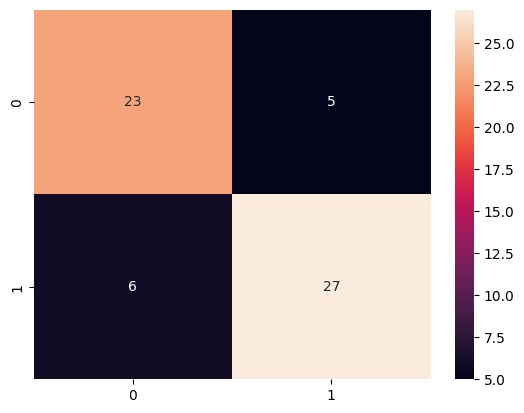

In [61]:
import seaborn as sns
sns.heatmap(cf_matrix,annot=True)

https://colab.research.google.com/drive/17FViiMJbJXQ5s9GOW94emoHcCKUcYr3l?usp=sharing 

In [62]:
# DL Project 2. MNIST Digit classification using NN.ipynb



#Precision,Recall and F1 score

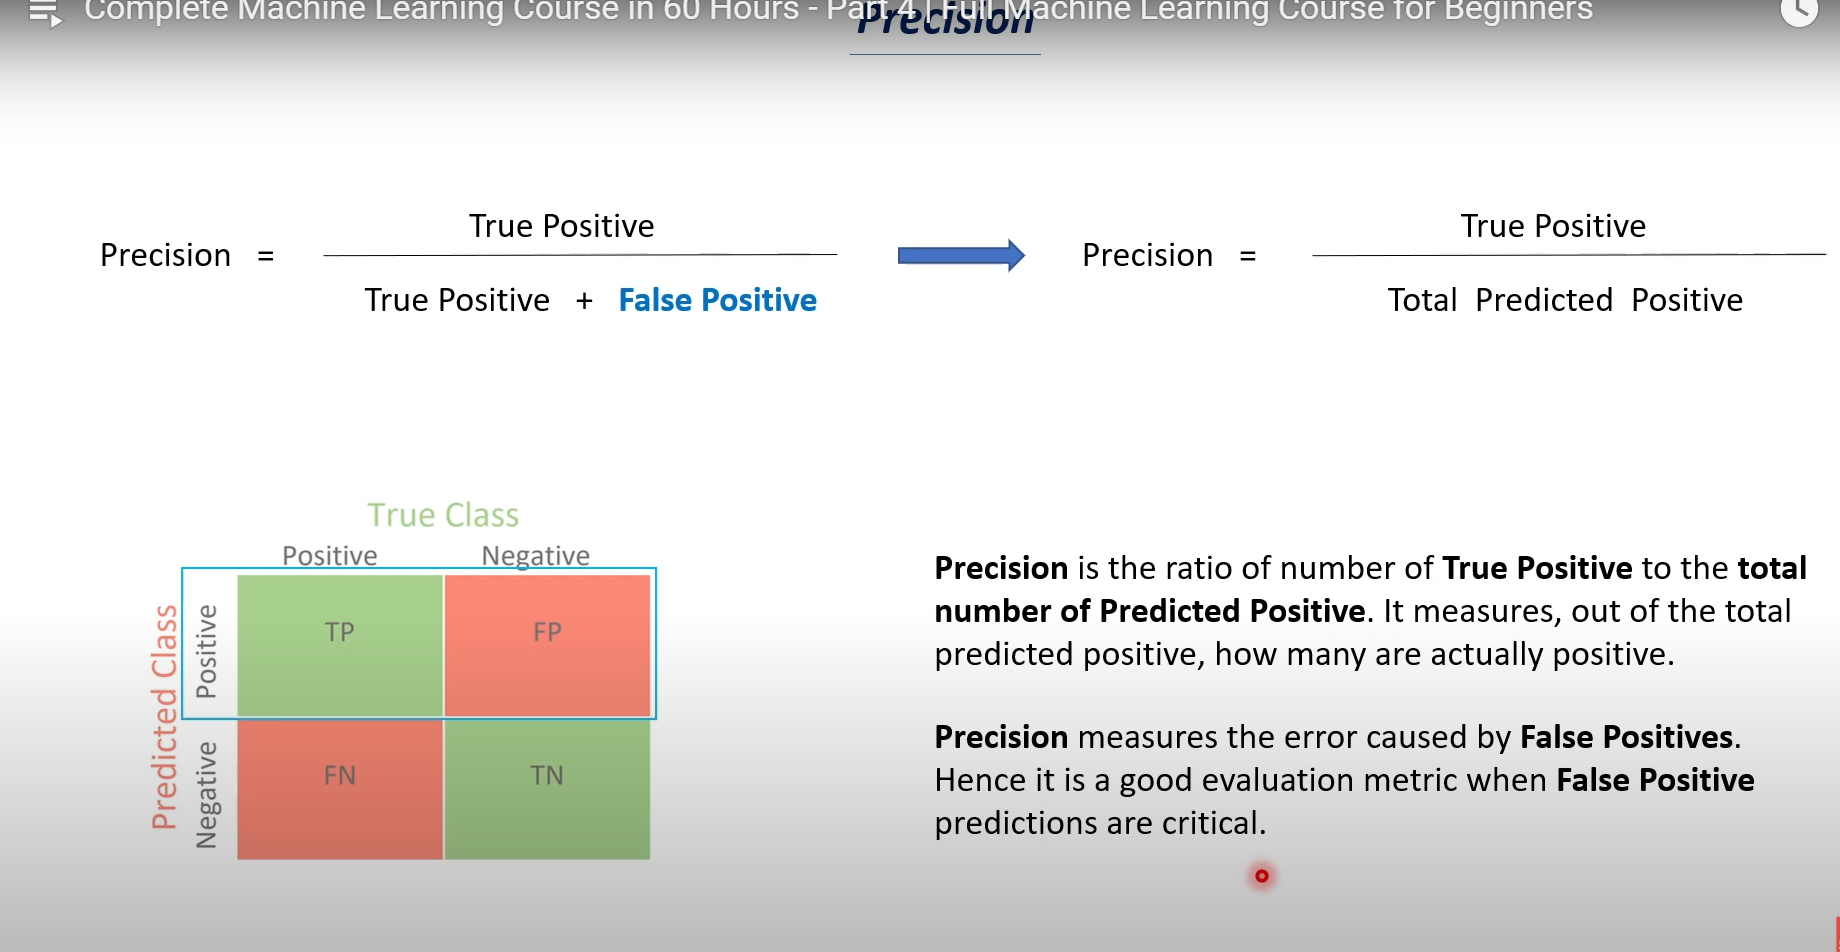

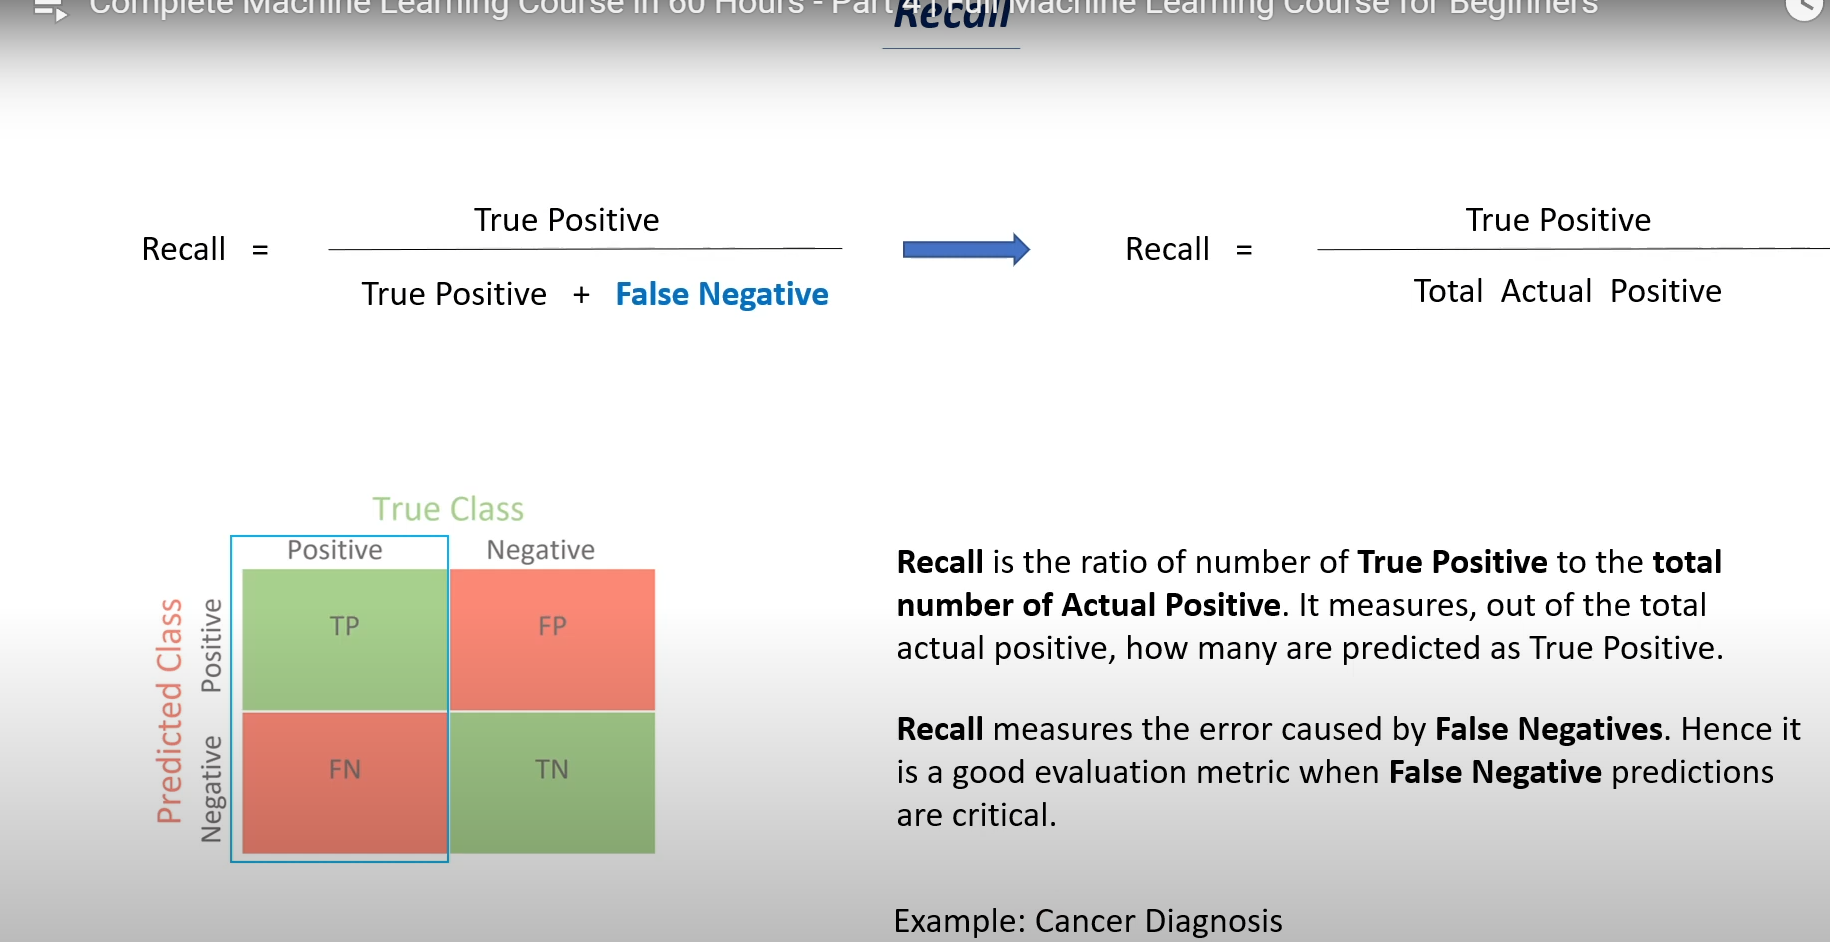

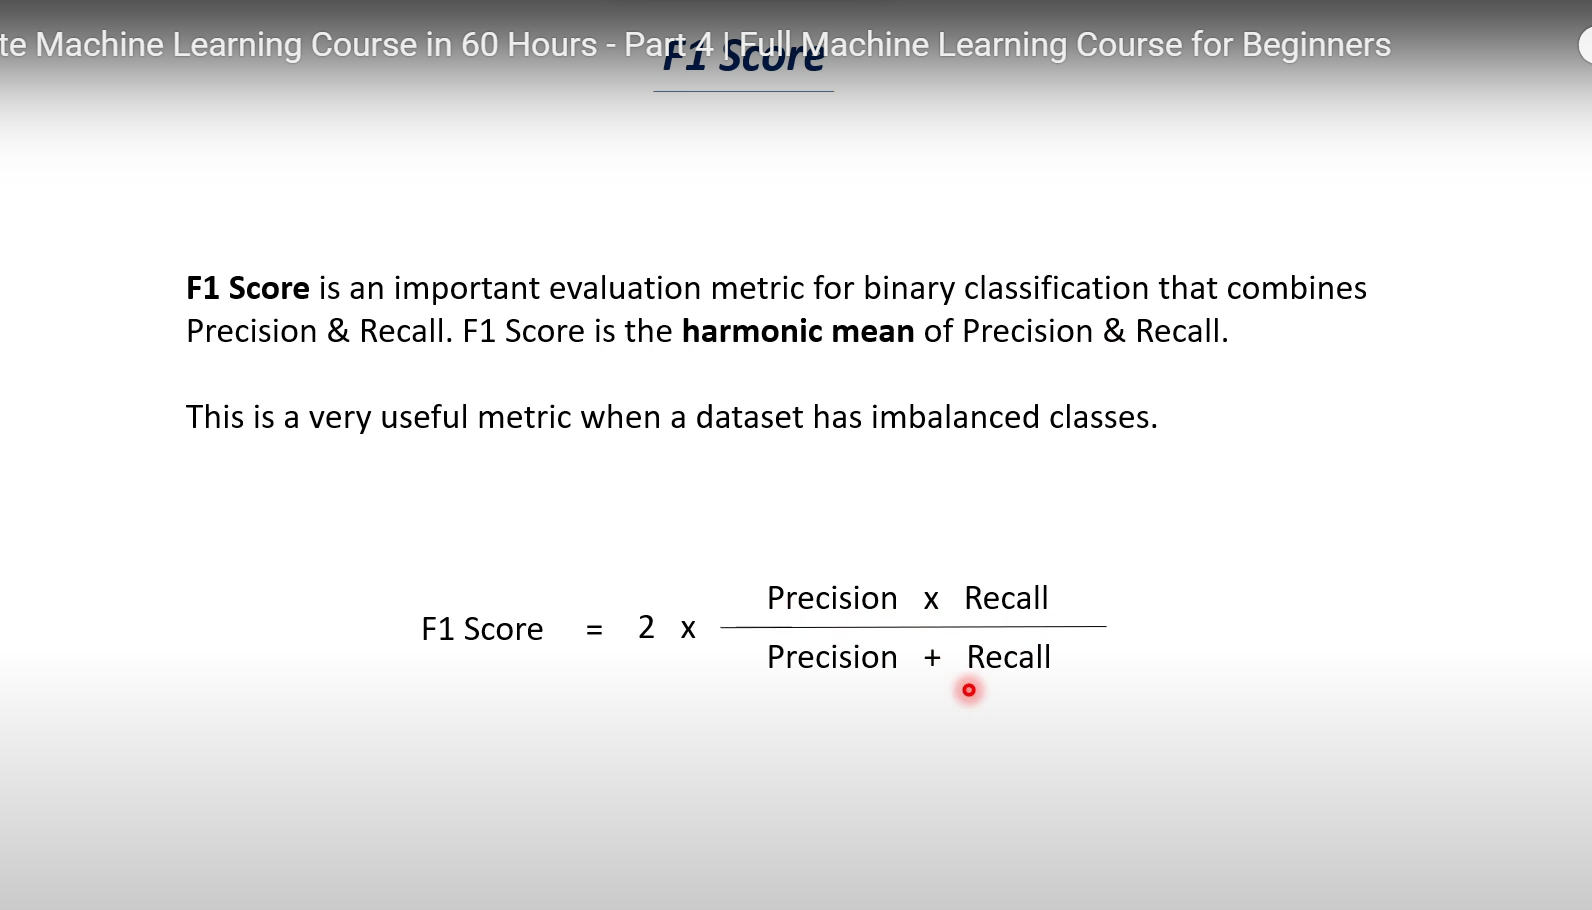

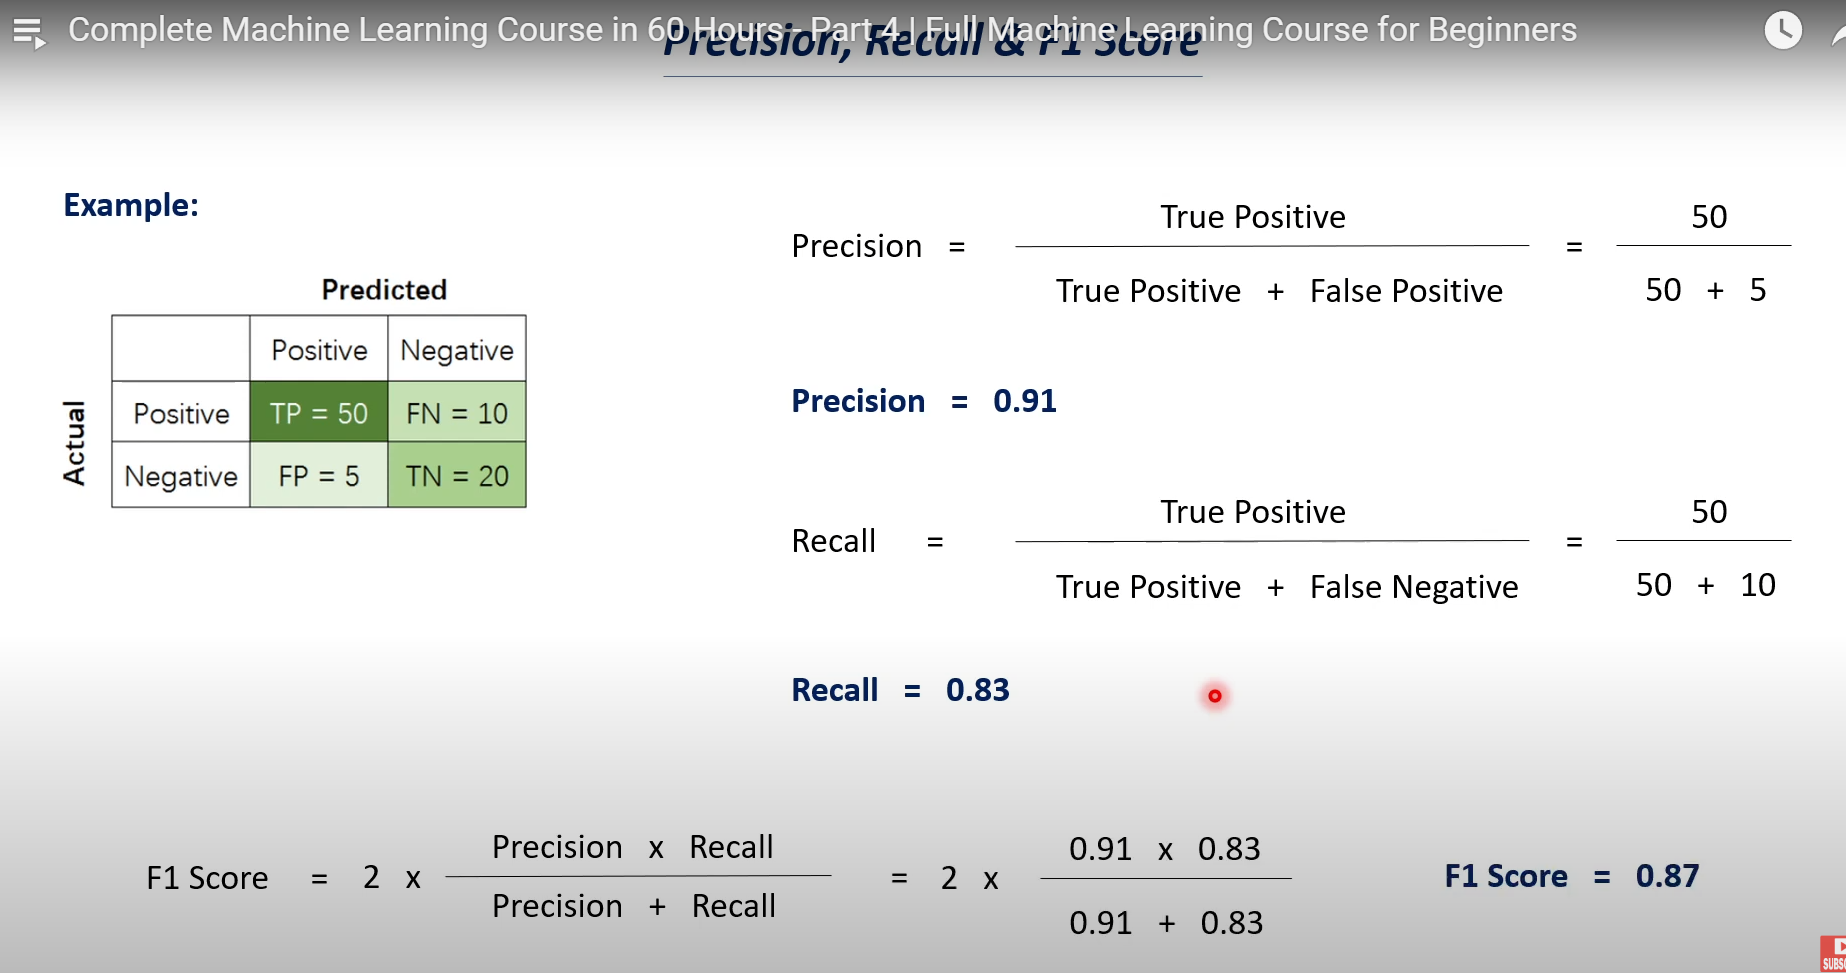

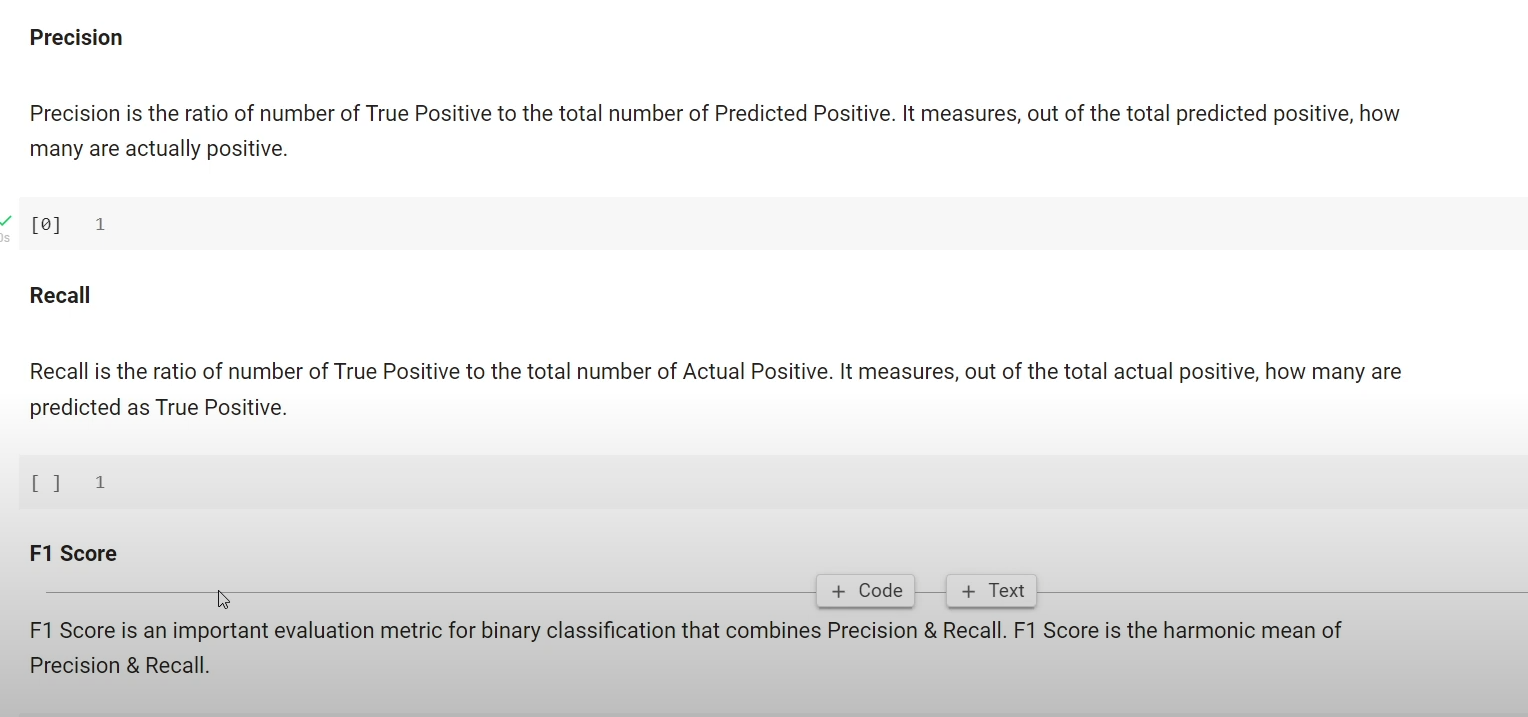

In [63]:
from sklearn.metrics import precision_score

In [64]:
#precision for training data predictions
precision_train = precision_score(Y_train,X_train_prediction)
print(precision_train)

0.8287671232876712


In [65]:
#precision for testing data predictions
precision_test = precision_score(Y_test,X_test_prediction)
print(precision_test)

0.84375


Recall

In [67]:
from sklearn.metrics import recall_score
#recall for training data predictions
recall_train = recall_score(Y_train,X_train_prediction)
print(recall_train)

#recall for testing data predictions
recall_test = recall_score(Y_test,X_test_prediction)
print(recall_test)

0.9166666666666666
0.8181818181818182


f1 score

In [68]:
from sklearn.metrics import f1_score
#f1 score for training data predictions
f1_score_train = f1_score(Y_train,X_train_prediction)
print(f1_score_train)

#f1 score for testing data predictions
f1_score_test = f1_score(Y_test,X_test_prediction)
print(f1_score_test)

0.8705035971223022
0.8307692307692308


In [72]:
def precision_recall_f1score(true_labels,predicted_labels):
  precision_value = precision_score(true_labels,predicted_labels)
  recall_value = recall_score(true_labels,predicted_labels)
  f1score_value = f1_score(true_labels,predicted_labels)

  print('Precision value = ',precision_value)
  print('Recall value = ',recall_value)
  print('F1 score value = ',f1score_value)

In [74]:
#classification metrics
precision_recall_f1score(Y_test,X_test_prediction)

Precision value =  0.84375
Recall value =  0.8181818181818182
F1 score value =  0.8307692307692308
